In [1]:
import numpy as np
import gudhi
import mdtraj as md
import seaborn as sns

In [2]:
traj = md.load_dcd('L_prd.dcd', top='L_clean.pdb')
traj = md.Trajectory.superpose(traj, traj[0], frame=0, atom_indices=None, ref_atom_indices=None, parallel=True)

traj3 = md.load('bottleneck_selected_trajectory.pdb')
traj3 = md.Trajectory.superpose(traj3, traj3[0], frame=0, atom_indices=None, ref_atom_indices=None, parallel=True)

rmsd = md.rmsd(traj3, traj3[0], frame=0, atom_indices=None, parallel=True, precentered=False)*10

np.save('BottleneckRMSD.npy',rmsd)

from pylab import *
from math import pi
time_steps = np.arange(0, 200)

fig, ax = plt.subplots(figsize=(12,6))
inty_ax = fig.add_axes([ax.get_position().x1 + 0.01, ax.get_position().y0,
                            0.15, ax.get_position().height])

ax.plot(time_steps, rmsd, marker='o', markersize=0, linestyle='-', lw=3)
ax.set_xlabel('Time Steps [ps]', fontsize = 15)
ax.set_ylabel('RMSD Value [Å]', fontsize = 15)
ax.tick_params(labelsize = 15)
sns.kdeplot(y = rmsd, ax = inty_ax, lw=3)
inty_ax.set_xlabel('Density', fontsize=15)
inty_ax.tick_params(labelleft = False, labelsize = 15)

fig.suptitle('56D-decapeptide RMSD', fontsize = 20)
plot_filename = f'56D-decapeptide RMSD.png'
plt.savefig(plot_filename, bbox_inches='tight', dpi=900)
plt.show()

subset_traj = traj[1642600:1642700]
subset_traj.save('bsheetbottleframes.pdb')

subset_traj = traj[100100:100200]
subset_traj.save('bsheetbottleframes.pdb')

num_frames = min(traj.n_frames, 1400000)

selected_frames = range(0, num_frames, 7000)
selected_traj = traj[selected_frames]

# Save the selected trajectories into a new PDB file
selected_traj.save_pdb('bottleneck_selected_trajectory.pdb')

In [3]:
atomic_coordinates = traj.xyz

In [4]:
for frame in range(traj.n_frames):
    atomic_coordinates = traj.xyz[frame]

In [5]:
frame2 = traj.xyz[0]

In [6]:
carbon_atoms = traj.topology.select("element == 'C'")
for frame in range(traj.n_frames):
    carbon_coordinates_frame = traj.xyz[frame, carbon_atoms, :]

In [7]:
frame1 = carbon_coordinates_frame = traj.xyz[0, carbon_atoms, :]

In [8]:
num_rows = np.size(frame1, axis=0)
print(f"Number of rows: {num_rows}")

Number of rows: 12


In [9]:
num_rows = np.size(frame2, axis=0)
print(f"Number of rows: {num_rows}")

Number of rows: 41


In [10]:
rips_complex = gudhi.RipsComplex(points=frame1)

In [11]:
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

In [12]:
persistence = simplex_tree.persistence()

/home/crystal/miniconda3/envs/openmm/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

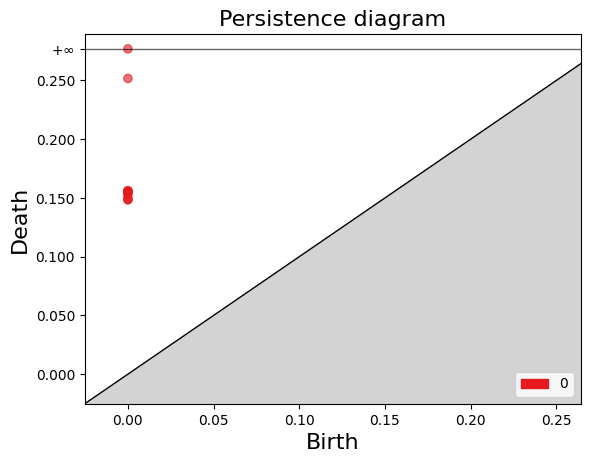

In [13]:
import matplotlib.pyplot as plt
gudhi.plot_persistence_diagram(persistence)


<Axes: title={'center': 'Persistence barcode'}>

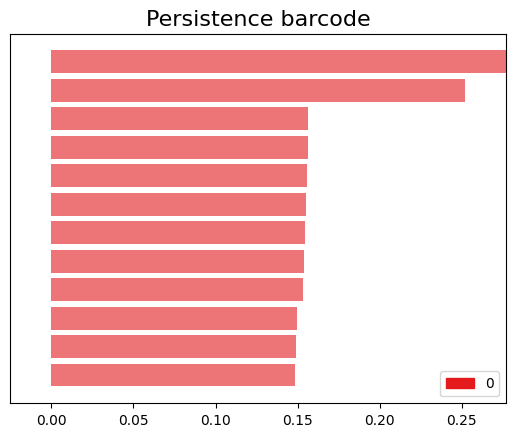

In [14]:
gudhi.plot_persistence_barcode(persistence)

In [15]:
persistence

[(0, (0.0, inf)),
 (0, (0.0, 0.2516849068011418)),
 (0, (0.0, 0.15610758280858772)),
 (0, (0.0, 0.1560490072877096)),
 (0, (0.0, 0.1554226268287264)),
 (0, (0.0, 0.15478603581194283)),
 (0, (0.0, 0.1544167655335463)),
 (0, (0.0, 0.15410114544317008)),
 (0, (0.0, 0.15329685756587266)),
 (0, (0.0, 0.14987373802046802)),
 (0, (0.0, 0.14877538384309016)),
 (0, (0.0, 0.14828509511414797))]

first_frame = traj[0]
first_frame.save("first_frame_output.pdb")

a_helix = traj[1642600]
a_helix.save("bsheet_frame_output.pdb")